In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as scikit_learn

In [4]:
csv_path = "/Users/saifmohammed/Desktop/DiabetIQ/ML/Test/Copy Dataset/Diabetes_Final_Data_V20.csv"
df = pd.read_csv(csv_path)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [6]:
df.shape

(5437, 15)

In [8]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

In [10]:
df[df.duplicated()]

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic


<Axes: xlabel='age'>

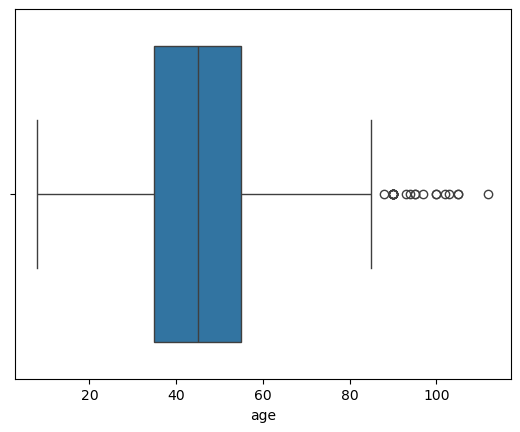

In [12]:
sns.boxplot(x=df['age'])

In [14]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the outlier values in the 'age' column
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Display the outlier values
outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
360,90,Female,60,222,111,7.58,1.60,58.2,22.73,0,1,0,0,0,No
404,90,Male,68,180,76,8.44,1.65,70.3,25.79,0,1,0,1,0,No
487,97,Male,121,143,88,8.68,1.55,49.4,20.58,0,0,0,0,0,No
633,94,Female,81,187,86,5.12,1.32,24.5,14.04,0,0,0,0,0,No
713,105,Male,78,160,85,9.77,1.63,45.0,17.03,0,0,0,0,0,No
768,90,Male,63,132,59,7.77,1.52,48.0,20.67,0,0,0,0,0,No
887,90,Male,93,179,95,6.40,1.47,25.5,11.75,0,0,0,0,0,No
1250,95,Male,71,148,75,7.20,1.60,65.8,25.70,0,0,0,0,0,No
1769,105,Female,90,153,77,8.64,1.47,36.0,16.59,0,0,0,0,0,No
1862,93,Male,79,110,67,8.32,1.65,58.0,21.28,0,0,0,0,0,No


In [16]:
# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [18]:
non_outliers.shape

(5414, 15)

<Axes: xlabel='age'>

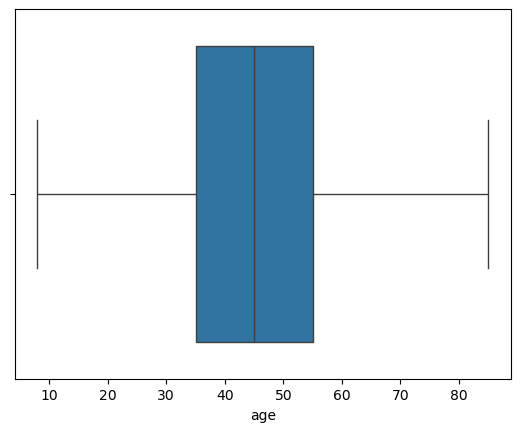

In [20]:
df = non_outliers
sns.boxplot(x=df['age'])

In [22]:
df['diabetic'].value_counts()

diabetic
No     5070
Yes     344
Name: count, dtype: int64

In [24]:
df['gender'].value_counts()

gender
Female    3849
Male      1565
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5414 non-null   int64  
 1   gender                  5414 non-null   object 
 2   pulse_rate              5414 non-null   int64  
 3   systolic_bp             5414 non-null   int64  
 4   diastolic_bp            5414 non-null   int64  
 5   glucose                 5414 non-null   float64
 6   height                  5414 non-null   float64
 7   weight                  5414 non-null   float64
 8   bmi                     5414 non-null   float64
 9   family_diabetes         5414 non-null   int64  
 10  hypertensive            5414 non-null   int64  
 11  family_hypertension     5414 non-null   int64  
 12  cardiovascular_disease  5414 non-null   int64  
 13  stroke                  5414 non-null   int64  
 14  diabetic                5414 non-null   objec

In [28]:
# Ensure you're modifying the original dataframe
df = df.copy()

df['gender'] = df['gender'].astype('category')
df['diabetic'] = df['diabetic'].astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     5414 non-null   int64   
 1   gender                  5414 non-null   category
 2   pulse_rate              5414 non-null   int64   
 3   systolic_bp             5414 non-null   int64   
 4   diastolic_bp            5414 non-null   int64   
 5   glucose                 5414 non-null   float64 
 6   height                  5414 non-null   float64 
 7   weight                  5414 non-null   float64 
 8   bmi                     5414 non-null   float64 
 9   family_diabetes         5414 non-null   int64   
 10  hypertensive            5414 non-null   int64   
 11  family_hypertension     5414 non-null   int64   
 12  cardiovascular_disease  5414 non-null   int64   
 13  stroke                  5414 non-null   int64   
 14  diabetic                5414 

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['diabetic'] = le.fit_transform(df['diabetic'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5414 non-null   int64  
 1   gender                  5414 non-null   int64  
 2   pulse_rate              5414 non-null   int64  
 3   systolic_bp             5414 non-null   int64  
 4   diastolic_bp            5414 non-null   int64  
 5   glucose                 5414 non-null   float64
 6   height                  5414 non-null   float64
 7   weight                  5414 non-null   float64
 8   bmi                     5414 non-null   float64
 9   family_diabetes         5414 non-null   int64  
 10  hypertensive            5414 non-null   int64  
 11  family_hypertension     5414 non-null   int64  
 12  cardiovascular_disease  5414 non-null   int64  
 13  stroke                  5414 non-null   int64  
 14  diabetic                5414 non-null   int64

In [36]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
825,61,1,64,122,69,9.86,1.78,47.8,15.12,0,0,0,0,0,1
2768,35,0,108,123,74,6.40,1.55,60.5,25.20,0,0,0,0,0,0
67,29,0,75,138,88,10.75,1.55,58.4,24.33,0,0,0,0,0,0
1827,56,0,88,132,78,10.41,1.52,53.0,22.82,0,0,0,0,0,0
5068,30,0,76,140,93,6.86,1.60,68.0,26.56,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,40,0,88,123,82,6.88,1.52,63.0,27.13,0,0,0,0,0,0
1418,55,0,63,154,90,7.97,1.52,45.1,19.42,0,0,0,0,0,0
1594,38,1,79,93,62,9.43,1.65,55.6,20.40,0,0,0,0,0,0
1038,75,1,84,162,95,10.44,1.70,51.6,17.82,0,0,0,0,0,0


In [38]:
df = df.reset_index()
df

,index,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,825,61,1,64,122,69,9.86,1.78,47.8,15.12,0,0,0,0,0,1
1,2768,35,0,108,123,74,6.40,1.55,60.5,25.20,0,0,0,0,0,0
2,67,29,0,75,138,88,10.75,1.55,58.4,24.33,0,0,0,0,0,0
3,1827,56,0,88,132,78,10.41,1.52,53.0,22.82,0,0,0,0,0,0
4,5068,30,0,76,140,93,6.86,1.60,68.0,26.56,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,2892,40,0,88,123,82,6.88,1.52,63.0,27.13,0,0,0,0,0,0
5410,1418,55,0,63,154,90,7.97,1.52,45.1,19.42,0,0,0,0,0,0
5411,1594,38,1,79,93,62,9.43,1.65,55.6,20.40,0,0,0,0,0,0
5412,1038,75,1,84,162,95,10.44,1.70,51.6,17.82,0,0,0,0,0,0


In [40]:
x = df.drop('diabetic', axis=1)
y = df['diabetic']

In [42]:
x.columns

Index(['index', 'age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp',
       'glucose', 'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke'],
      dtype='object')

In [44]:
y

0       1
1       0
2       0
3       0
4       0
       ..
5409    0
5410    0
5411    0
5412    0
5413    0
Name: diabetic, Length: 5414, dtype: int64

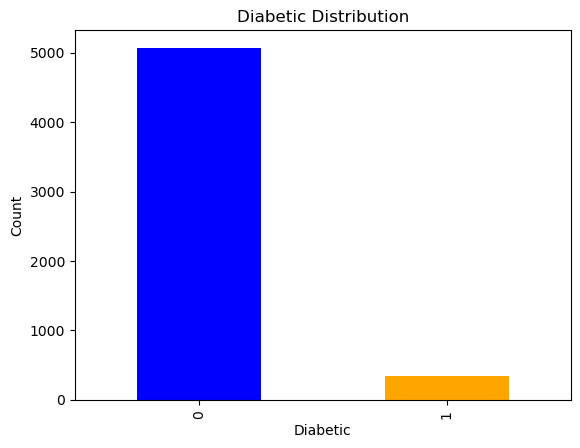

In [46]:
y.value_counts().plot(kind = 'bar', color = ['blue', 'orange']) 
plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

In [48]:
class_counts = y.value_counts()
class_counts

diabetic
0    5070
1     344
Name: count, dtype: int64

In [50]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    93.646103
1     6.353897
Name: count, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

# Split the data with stratified sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("x_train data size", len(x_train))
print("y_train data size", len(y_train))
print("x_test data size", len(x_test))
print("y_test data size", len(y_test))

x_train data size 4331
y_train data size 4331
x_test data size 1083
y_test data size 1083


In [54]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
std_scaler = StandardScaler()
std_scaled_x_train = std_scaler.fit_transform(x_train)
std_scaled_x_test = std_scaler.transform(x_test)

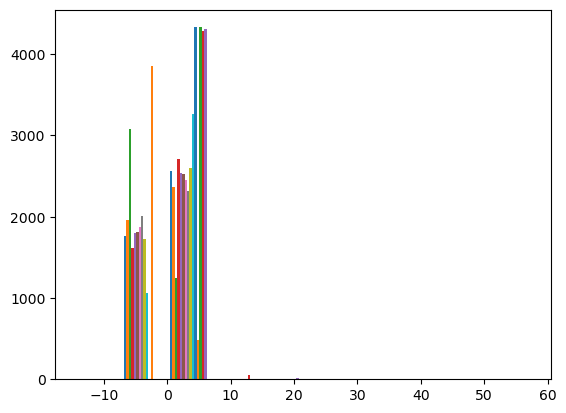

In [56]:
plt.hist(std_scaled_x_train)
plt.show()

In [58]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=0.7, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(std_scaled_x_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 4056, 1: 2839})


In [60]:
class_counts = y_train_resampled.value_counts()
class_counts

diabetic
0    4056
1    2839
Name: count, dtype: int64

In [62]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    58.825236
1    41.174764
Name: count, dtype: float64

## Supprt Machine Vector (SVM)

In [97]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC()
svm.fit(x_train_resampled, y_train_resampled)

SVC()

In [99]:
svm_pred = svm.predict(std_scaled_x_test)
svm_pred

array([0, 1, 0, ..., 1, 0, 0])

In [101]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

cm = confusion_matrix(y_test, svm_pred)
cm

array([[918,  96],
       [ 21,  48]])

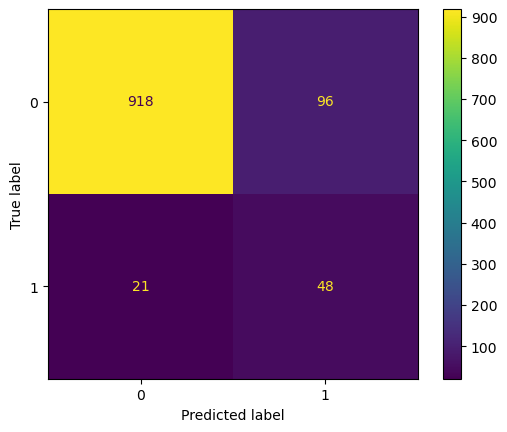

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [105]:
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.89
Precision: 0.33
F1: 0.45
Recall: 0.70


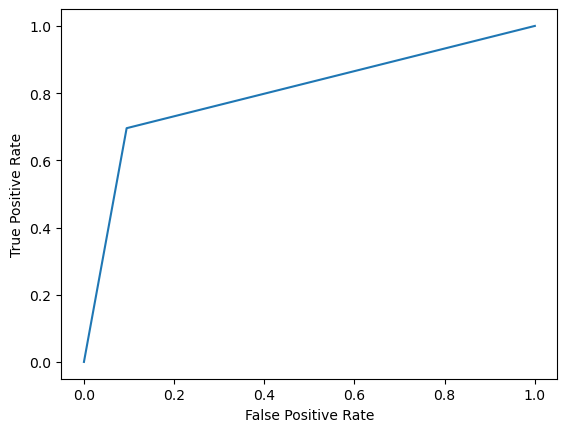

In [107]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, svm_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [109]:
from sklearn.metrics import auc

auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.80


## Hyperparameter Tuning (SVM)

In [82]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]  # Polynomial degree (only used for 'poly' kernel)
}

# Initialize SVM classifier
svm = SVC()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Fit the Grid Search on training data
grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   2.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   1.5s
[CV] END .........C=0.1, degree=2, gamma=auto, kernel=linear; total time=   1.3s
[CV] END ............C=0.1, degree=2, gamma=auto, kernel=rbf; total time=   2.0s
[CV] END ........C=0.1, degree=2, gamma=auto, kernel=sigmoid; total time=   1.9s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   2.1s
[CV] END .......C=0.1, degree=3, gamma=scale, kernel=sigmoid; total time=   2.0s
[CV] END .........C=0.1, degree=3, gamma=auto, kernel=linear; total time=   1.3s
[CV] END ...........C=0.1, degree=3, gamma=auto, kernel=poly; total time=   1.3s
[CV] END ........C=0.1, degree=3, gamma=auto, kernel=sigmoid; total time=   1.8s
[CV] END ...........C=0.1, degree=4, gamma=scale, kernel=rbf; total time=   2.0s
[CV] END .......C=0.1, degree=4, gamma=scale, k

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [84]:
# Best parameters and model
print(grid_search.best_params_)
best_svm_clf = grid_search.best_estimator_
best_svm_clf

{'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


SVC(C=100, degree=2, gamma='auto')

In [86]:
svm_pred = best_svm_clf.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
f1 = f1_score(y_test,svm_pred)
recall = recall_score(y_test, svm_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.89
Precision: 0.25
F1: 0.30
Recall: 0.38


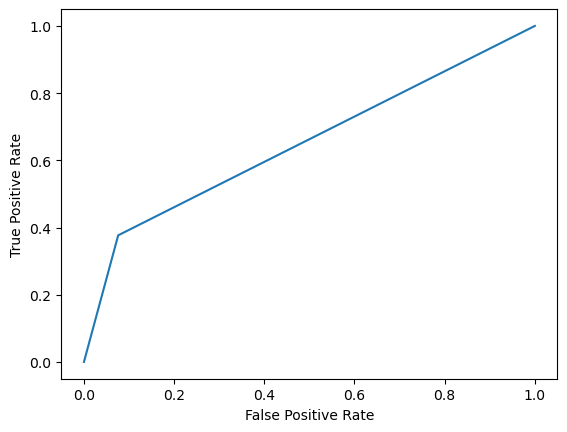

In [90]:
fpr, tpr, _ = roc_curve(y_test, svm_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [92]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.65


## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model with resampled data
log_reg.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [111]:
# Predict on the test set
log_reg_pred = log_reg.predict(std_scaled_x_test)
log_reg_pred

array([0, 1, 0, ..., 1, 0, 0])

In [113]:
cm = confusion_matrix(y_test, log_reg_pred)
cm

array([[894, 120],
       [ 17,  52]])

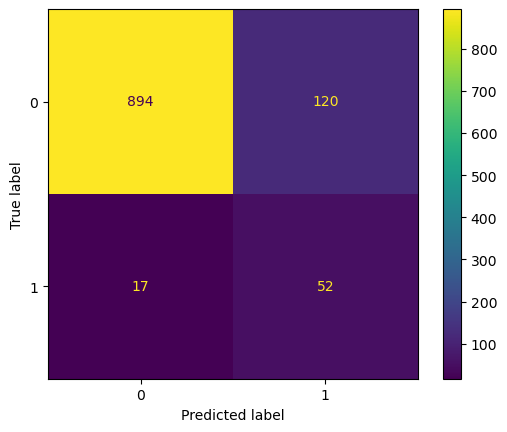

In [115]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [119]:
accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred)
f1 = f1_score(y_test, log_reg_pred)
recall = recall_score(y_test, log_reg_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.87
Precision: 0.30
F1: 0.43
Recall: 0.75


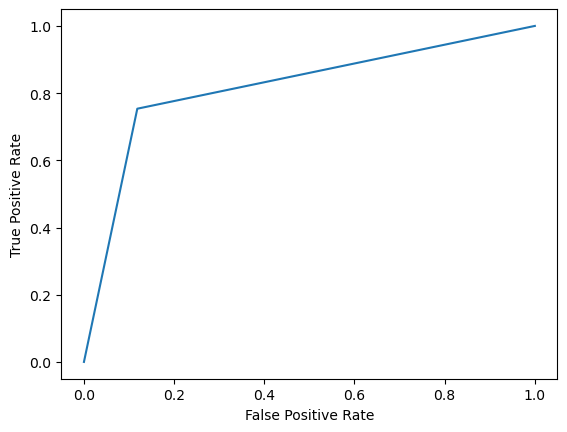

In [121]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, log_reg_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [123]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.82


## Hyperparameter Tuning (Logistic Regression)

In [130]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Removed 'elasticnet' and 'None'
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga'],  # 'saga' works with L1 & L2
}

log_reg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(
    estimator=log_reg, 
    param_grid=param_grid, 
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2   # Display progress
)

grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [132]:
print(grid_search.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [134]:
best_log_reg = grid_search.best_estimator_
best_log_reg

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [136]:
log_reg_pred = best_log_reg.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred)
f1 = f1_score(y_test, log_reg_pred)
recall = recall_score(y_test, log_reg_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.88
Precision: 0.32
F1: 0.45
Recall: 0.77


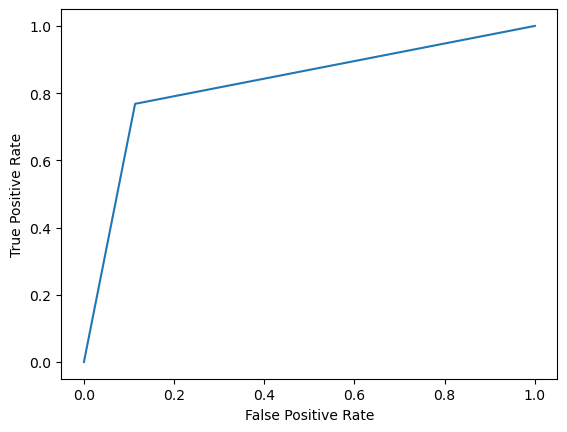

In [140]:
fpr, tpr, _ = roc_curve(y_test, log_reg_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [142]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.83
